## Generating Trade Signals using Moving Average(MA) Crossover Strategy- SMA and EMA for AMAZON STOCK

Moving Averages are used to analyze the time-series data by calculating a series of averages of the different subsets of full dataset.

### We have used 2 types of Moving Averages-Simple Moving Avergae and Exponential Moving Average(EMEA)

#### Simple Moving Average Forumla:
    
The simple moving average = (sum of the an asset price over the past n periods) / (number of periods)

#### Exponential Moving Average Forumla:


EMA [today] = (α x Price [today] ) + ((1 — α) x EMA [yesterday] )

Where:

α = 2/(N + 1)

N = the length of the window (moving average period)

EMA [today] = the current EMA value

Price [today] = the current closing price

EMA [yesterday] = the previous EMA value


In [42]:
# import package
import pandas_datareader.data as web
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [43]:
# set start and end dates - Taking data for Amazon stock from 2014-2019

start = datetime.datetime(2014, 2, 1) 
end = datetime.datetime(2019, 12, 31) 
# extract the closing price data
amzn_df = web.DataReader(['AMZN'], 'yahoo', start = start, end = end)['Close']
amzn_df.columns = {'Close Price'}
amzn_df.head(10)

,Close Price
Date,
2014-02-03,346.149994
2014-02-04,347.950012
2014-02-05,346.450012
2014-02-06,354.589996
2014-02-07,361.079987
2014-02-10,360.869995
2014-02-11,361.790009
2014-02-12,349.250000
2014-02-13,357.200012


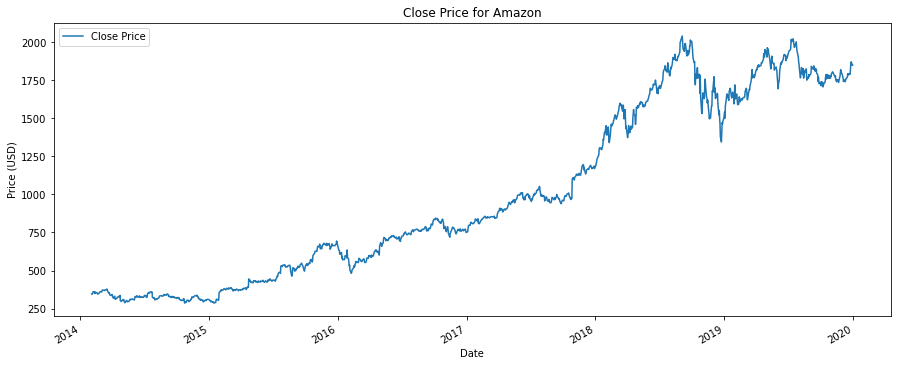

In [44]:
#Plotting Closig price for Amazon Stock

amzn_df[['Close Price']].plot(figsize=(15,6))
plt.title('Close Price for Amazon')
plt.ylabel('Price (USD)')
plt.show()

In [45]:
# create 20 days simple moving average column
amzn_df['20_SMA'] = amzn_df['Close Price'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
amzn_df['50_SMA'] = amzn_df['Close Price'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
amzn_df.head()

,Close Price,20_SMA,50_SMA
Date,,,
2014-02-03,346.149994,346.149994,346.149994
2014-02-04,347.950012,347.050003,347.050003
2014-02-05,346.450012,346.850006,346.850006
2014-02-06,354.589996,348.785004,348.785004
2014-02-07,361.079987,351.244000,351.244000


In [46]:
amzn_df['Signal'] = 0.0
amzn_df['Signal'] = np.where(amzn_df['20_SMA'] > amzn_df['50_SMA'], 1.0, 0.0)

In [47]:
amzn_df['Position'] = amzn_df['Signal'].diff()
# display first few rows
amzn_df.head()

,Close Price,20_SMA,50_SMA,Signal,Position
Date,,,,,
2014-02-03,346.149994,346.149994,346.149994,0.0,NaN
2014-02-04,347.950012,347.050003,347.050003,0.0,0.0
2014-02-05,346.450012,346.850006,346.850006,0.0,0.0
2014-02-06,354.589996,348.785004,348.785004,0.0,0.0
2014-02-07,361.079987,351.244000,351.244000,0.0,0.0


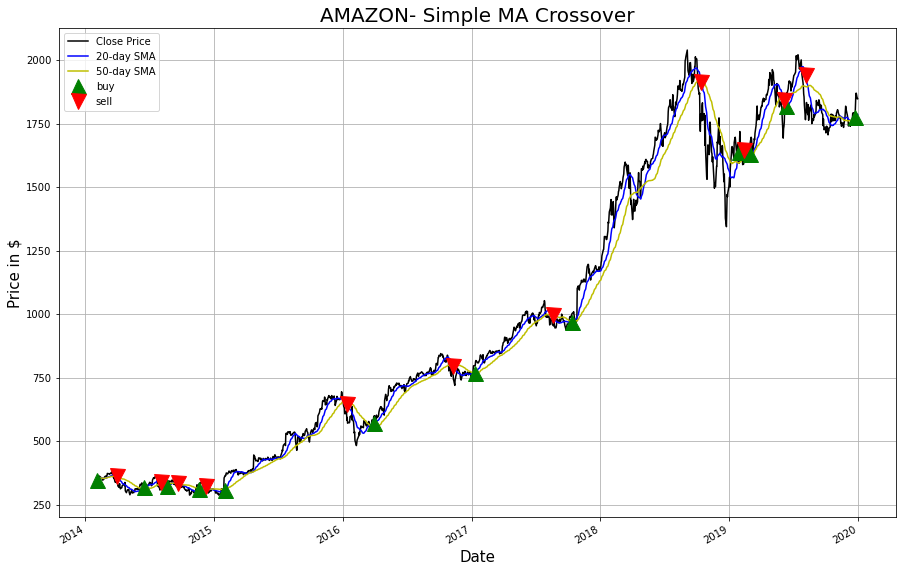

In [52]:
plt.figure(figsize = (15,10))
# plot close price, short-term and long-term moving averages 
amzn_df['Close Price'].plot(color = 'k', label= 'Close Price') 
amzn_df['20_SMA'].plot(color = 'b',label = '20-day SMA') 
amzn_df['50_SMA'].plot(color = 'y',label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(amzn_df[amzn_df['Position'] == 1].index, 
         amzn_df['20_SMA'][amzn_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(amzn_df[amzn_df['Position'] == -1].index, 
         amzn_df['20_SMA'][amzn_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in $', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('AMAZON- Simple MA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

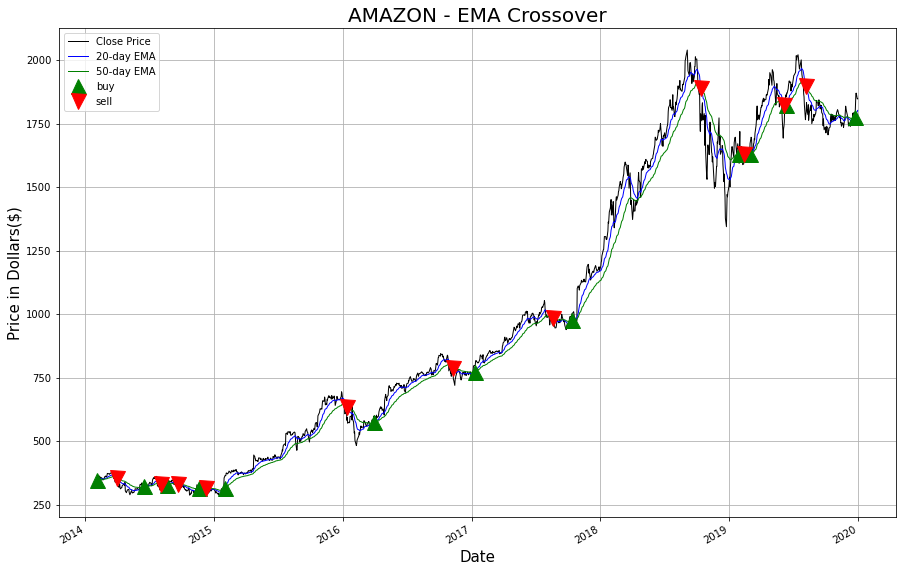

In [53]:
# Create 20 days exponential moving average column
amzn_df['20_EMA'] = amzn_df['Close Price'].ewm(span = 20, adjust = False).mean()
# Create 50 days exponential moving average column
amzn_df['50_EMA'] = amzn_df['Close Price'].ewm(span = 50, adjust = False).mean()
# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0
  
amzn_df['Signal'] = 0.0  
amzn_df['Signal'] = np.where(amzn_df['20_EMA'] > amzn_df['50_EMA'], 1.0, 0.0)
# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
amzn_df['Position'] = amzn_df['Signal'].diff()
plt.figure(figsize = (15,10))
# plot close price, short-term and long-term moving averages 
amzn_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
amzn_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
amzn_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')
# plot ‘buy’ and 'sell' signals
plt.plot(amzn_df[amzn_df['Position'] == 1].index, 
         amzn_df['20_EMA'][amzn_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(amzn_df[amzn_df['Position'] == -1].index, 
         amzn_df['20_EMA'][amzn_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Dollars($)', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('AMAZON - EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()
